In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
icuStays = pd.read_csv('/Users/ashademeij/Downloads/Thesis/Code/Data/augmented_df.csv')
diagnoses_num = pd.read_csv("/Users/ashademeij/Downloads/Thesis/Code/Data/diagnoses_enum.csv")
diag = pd.read_csv("/Users/ashademeij/Downloads/Thesis/Code/Data/diag.csv")

In [3]:
procedures = pd.read_csv("/Users/ashademeij/Downloads/Thesis/mimic-iv-2.2/hosp/procedures_icd.csv.gz")

## Making final touches to data set / Feature engineering

Papers:
- https://www.mdpi.com/2076-3417/13/12/6930 

**NEXT STEPS:**
- logarithmic trans of the outcomes, bin the los, multinomial regression (extension of log reg)
--> bin from lit: https://www.researchgate.net/publication/325561071_Predictive_modeling_in_urgent_care_a_comparative_study_of_machine_learning_approaches ('1-2', '2-3', '3-5', '5-8', '8-14', '14-21', '14-21', '21-30')
- forward or backward selection for feature selection
- look if the biasness has same behaviour across the different models and not just one
- make the models without the protected attributes and see if it performs better
- class imbalance --> rerun
- send email presentation day, before july 2nd

### Some extra merging

In [4]:
icuStays.drop('diagnoses_count', axis=1, inplace=True)
print(icuStays.columns)
icuStays.head()

Index(['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit',
       'intime', 'outtime', 'los', 'admission_location', 'discharge_location',
       'insurance', 'language', 'marital_status', 'race', 'raceGroup_1',
       'raceGroup_2', 'gender', 'anchor_age'],
      dtype='object')


,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,admission_location,discharge_location,insurance,language,marital_status,race,raceGroup_1,raceGroup_2,gender,anchor_age
0,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,EMERGENCY ROOM,HOME HEALTH CARE,Other,?,MARRIED,WHITE,White,NonMinority,F,55
1,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,PACU,HOME,Other,ENGLISH,MARRIED,WHITE,White,NonMinority,F,46
2,10001884,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.171817,EMERGENCY ROOM,DIED,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,Black/African American,Minority,F,68
3,10002013,23581541,39060235,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2160-05-18 10:00:53,2160-05-19 17:33:33,1.314352,PHYSICIAN REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,SINGLE,OTHER,Other,Minority,F,53
4,10002155,23822395,33685454,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2129-08-04 12:45:00,2129-08-10 17:02:38,6.178912,PROCEDURE SITE,CHRONIC/LONG TERM ACUTE CARE,Other,ENGLISH,MARRIED,WHITE,White,NonMinority,F,80


In [5]:
diagnoses_num.head()

,hadm_id,diagnoses_num
0,20000019,12
1,20000024,10
2,20000034,28
3,20000041,10
4,20000057,23


In [17]:
icuStays['diagnoses_num'] = icuStays['hadm_id'].map(diagnoses_num.set_index('hadm_id')['diagnoses_num'])
icuStays.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,admission_location,discharge_location,insurance,language,marital_status,race,raceGroup_1,raceGroup_2,gender,anchor_age,diagnoses_num
0,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,EMERGENCY ROOM,HOME HEALTH CARE,Other,?,MARRIED,WHITE,White,NonMinority,F,55,10.0
1,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,PACU,HOME,Other,ENGLISH,MARRIED,WHITE,White,NonMinority,F,46,18.0
2,10001884,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.171817,EMERGENCY ROOM,DIED,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,Black/African American,Minority,F,68,36.0
3,10002013,23581541,39060235,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2160-05-18 10:00:53,2160-05-19 17:33:33,1.314352,PHYSICIAN REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,SINGLE,OTHER,Other,Minority,F,53,22.0
4,10002155,23822395,33685454,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2129-08-04 12:45:00,2129-08-10 17:02:38,6.178912,PROCEDURE SITE,CHRONIC/LONG TERM ACUTE CARE,Other,ENGLISH,MARRIED,WHITE,White,NonMinority,F,80,20.0


In [7]:
print(icuStays['first_careunit'].unique())

['Surgical Intensive Care Unit (SICU)'
 'Medical/Surgical Intensive Care Unit (MICU/SICU)'
 'Medical Intensive Care Unit (MICU)'
 'Cardiac Vascular Intensive Care Unit (CVICU)' 'Coronary Care Unit (CCU)'
 'Neuro Intermediate' 'Trauma SICU (TSICU)' 'Neuro Stepdown'
 'Neuro Surgical Intensive Care Unit (Neuro SICU)']


In [18]:
print(diag.shape)

unique_hadm_ids = icuStays['hadm_id'].unique()
diag = diag[diag['hadm_id'].isin(unique_hadm_ids)]

print(diag.shape)

diag.head()

(430852, 23)
(48960, 23)


,hadm_id,subject_id,Chapter I,Chapter II,Chapter III,Chapter IV,Chapter IX,Chapter V,Chapter VI,Chapter VII,...,Chapter XII,Chapter XIII,Chapter XIV,Chapter XIX,Chapter XV,Chapter XVI,Chapter XVII,Chapter XVIII,Chapter XX,Chapter XXI
8,20000147,269824032,0,0,0,5,5,1,1,0,...,0,2,1,0,0,0,0,0,0,2
34,20000808,117521243,0,1,0,0,1,2,2,0,...,0,0,0,0,0,0,0,0,0,0
48,20001305,496113491,0,2,1,1,2,1,1,0,...,0,1,1,3,0,0,0,2,4,7
50,20001361,160353237,0,0,0,1,1,2,1,0,...,0,1,1,0,0,0,0,1,0,0
59,20001494,207676833,0,2,0,0,2,1,0,0,...,0,0,1,0,0,0,0,1,2,3


In [19]:
cols_to_add = ['hadm_id', 'Chapter I', 'Chapter II', 'Chapter III', 'Chapter IV', 'Chapter V', 'Chapter VI', 'Chapter VII', 'Chapter VIII', 'Chapter IX', 'Chapter X', 'Chapter XI', 'Chapter XII', 'Chapter XIII', 'Chapter XIV', 'Chapter XIX', 'Chapter XV', 'Chapter XVI', 'Chapter XVII', 'Chapter XVIII', 'Chapter XX', 'Chapter XXI']
selected_col = diag[cols_to_add]
merged = pd.merge(icuStays, selected_col, on=['hadm_id'], how='left')
merged.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,admission_location,discharge_location,...,Chapter XII,Chapter XIII,Chapter XIV,Chapter XIX,Chapter XV,Chapter XVI,Chapter XVII,Chapter XVIII,Chapter XX,Chapter XXI
0,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,EMERGENCY ROOM,HOME HEALTH CARE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,PACU,HOME,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
2,10001884,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.171817,EMERGENCY ROOM,DIED,...,0.0,3.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,8.0
3,10002013,23581541,39060235,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2160-05-18 10:00:53,2160-05-19 17:33:33,1.314352,PHYSICIAN REFERRAL,HOME HEALTH CARE,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,10002155,23822395,33685454,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2129-08-04 12:45:00,2129-08-10 17:02:38,6.178912,PROCEDURE SITE,CHRONIC/LONG TERM ACUTE CARE,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0


In [10]:
merged.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit',
       'intime', 'outtime', 'los', 'admission_location', 'discharge_location',
       'insurance', 'language', 'marital_status', 'race', 'raceGroup_1',
       'raceGroup_2', 'gender', 'anchor_age', 'diagnoses_num', 'Chapter I',
       'Chapter II', 'Chapter III', 'Chapter IV', 'Chapter V', 'Chapter VI',
       'Chapter VII', 'Chapter VIII', 'Chapter IX', 'Chapter X', 'Chapter XI',
       'Chapter XII', 'Chapter XIII', 'Chapter XIV', 'Chapter XIX',
       'Chapter XV', 'Chapter XVI', 'Chapter XVII', 'Chapter XVIII',
       'Chapter XX', 'Chapter XXI'],
      dtype='object')

In [76]:
def get_icu_shortcut(icu_name):
    icu_map = {
        'Surgical Intensive Care Unit (SICU)': 'SICU',
        'Medical/Surgical Intensive Care Unit (MICU/SICU)': 'MICU/SICU',
        'Medical Intensive Care Unit (MICU)': 'MICU',
        'Cardiac Vascular Intensive Care Unit (CVICU)': 'CVICU',
        'Coronary Care Unit (CCU)': 'CCU',
        'Neuro Intermediate': 'Neuro Intermediate',
        'Trauma SICU (TSICU)': 'TSICU',
        'Neuro Stepdown': 'Neuro Stepdown',
        'Neuro Surgical Intensive Care Unit (Neuro SICU)': 'Neuro SICU'
    }
    return icu_map.get(icu_name, 'first_careunit')

merged['first_careunit'] = merged['first_careunit'].apply(get_icu_shortcut)

In [77]:
merged.head(2)

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,admission_location,discharge_location,...,Chapter XII,Chapter XIII,Chapter XIV,Chapter XIX,Chapter XV,Chapter XVI,Chapter XVII,Chapter XVIII,Chapter XX,Chapter XXI
0,10001217,24597018,37067082,SICU,Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,EMERGENCY ROOM,HOME HEALTH CARE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,10001725,25563031,31205490,MICU/SICU,Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,PACU,HOME,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0


# Procedures

In [11]:

# Merge procedures with merged DataFrame
merged_procedures = pd.merge(procedures, merged, on=['subject_id', 'hadm_id'])

# Calculate start time of each ICU stay (intime + 24 hours)
merged_procedures['start_time'] = pd.to_datetime(merged_procedures['intime']) + pd.Timedelta(hours=24)

# Filter procedures DataFrame to include only first 24 hours of ICU stay
filtered_procedures = merged_procedures[merged_procedures['chartdate'] <= merged_procedures['start_time']]

# Count the number of procedures for each patient within the first 24 hours
procedure_counts = filtered_procedures.groupby(['subject_id', 'hadm_id']).size().reset_index(name='num_procedures')

# Merge the count DataFrame with the merged DataFrame
merged_with_counts = pd.merge(merged, procedure_counts, on=['subject_id', 'hadm_id'], how='left')

# Display the resulting DataFrame
print(merged_with_counts.shape)
merged_with_counts.head()


(48976, 41)


,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,admission_location,discharge_location,...,Chapter XIII,Chapter XIV,Chapter XIX,Chapter XV,Chapter XVI,Chapter XVII,Chapter XVIII,Chapter XX,Chapter XXI,num_procedures
0,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,EMERGENCY ROOM,HOME HEALTH CARE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
1,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,PACU,HOME,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0
2,10001884,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.171817,EMERGENCY ROOM,DIED,...,3.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,8.0,7.0
3,10002013,23581541,39060235,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2160-05-18 10:00:53,2160-05-19 17:33:33,1.314352,PHYSICIAN REFERRAL,HOME HEALTH CARE,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
4,10002155,23822395,33685454,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2129-08-04 12:45:00,2129-08-10 17:02:38,6.178912,PROCEDURE SITE,CHRONIC/LONG TERM ACUTE CARE,...,0.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0,7.0


In [14]:
procedures.columns

Index(['subject_id', 'hadm_id', 'seq_num', 'chartdate', 'icd_code',
       'icd_version'],
      dtype='object')

In [15]:
print("date", len(procedures['chartdate'].unique()))
print("id", len(procedures['hadm_id'].unique()))

date 35117
id 229445


# prescriptions

In [22]:
file_path = '/Users/ashademeij/Downloads/Thesis/mimic-iv-2.2/hosp/prescriptions.csv'

chunk_size = 5000 

chunks = []

# Ensure 'intime' is in datetime format
merged['intime'] = pd.to_datetime(merged['intime'])

# Calculate the end time for the 24-hour window
merged['start_time'] = merged['intime'] + pd.Timedelta(hours=24)

# Read and process the file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Convert 'starttime' to datetime
    chunk['starttime'] = pd.to_datetime(chunk['starttime'])
    
    # Merge the chunk with the ICU stays DataFrame to get the 'start_time' for each stay
    merged_chunk = chunk.merge(merged[['subject_id', 'hadm_id', 'stay_id', 'intime', 'start_time']], 
                               on=['subject_id', 'hadm_id'])
    
    # Filter the merged chunk to include only rows within the first 24 hours of ICU stay
    filtered_chunk = merged_chunk[merged_chunk['starttime'] <= merged_chunk['start_time']]
    
    # Keep only the specified columns
    filtered_chunk = filtered_chunk[['drug', 'subject_id', 'hadm_id']]
    
    # Append the filtered chunk to the list
    chunks.append(filtered_chunk)


# Concatenate all processed chunks into a single DataFrame
prescriptions_df = pd.concat(chunks, ignore_index=True)

# Display the first few rows of the DataFrame
prescriptions_df.head()


,drug,subject_id,hadm_id
0,Sodium Chloride 0.9% Flush,10001217,24597018
1,0.9% Sodium Chloride,10001217,24597018
2,LeVETiracetam,10001217,24597018
3,HydrALAzine,10001217,24597018
4,Lidocaine 1%,10001217,24597018


In [23]:
len(prescriptions_df['drug'].unique())

3192

In [25]:
# Pivot the DataFrame
pivot_df = prescriptions_df.pivot_table(index=['subject_id', 'hadm_id'], columns='drug', aggfunc='size', fill_value=0)
prescriptions_df = pivot_df.reset_index()
prescriptions_df.head()

drug,subject_id,hadm_id,CoQ10 (300mg),L-Citrulline,ketamine 5%/ lidocaine 5% / amit 2%,(0.9% NaCl),*NF* Abatacept,*NF* Allopurinol Sodium,*NF* Bicalutamide,*NF* Carbidopa-Levodopa (25-100),...,vitamine d3,vorinostat,vortioxetine,wellb,xalatan,zafirlukast,zinc oxide,zonisamide,zydis,zz
0,10001217,24597018,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10001725,25563031,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10001884,26184834,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10002013,23581541,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10002155,23822395,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
prescriptions_df.columns

Index(['subject_id', 'hadm_id', ' CoQ10 (300mg)', ' L-Citrulline',
       ' ketamine 5%/ lidocaine 5% / amit 2%', '(0.9% NaCl)', '*NF* Abatacept',
       '*NF* Allopurinol Sodium', '*NF* Bicalutamide',
       '*NF* Carbidopa-Levodopa (25-100)',
       ...
       'vitamine d3', 'vorinostat', 'vortioxetine', 'wellb', 'xalatan',
       'zafirlukast', 'zinc oxide', 'zonisamide', 'zydis', 'zz'],
      dtype='object', name='drug', length=3194)

In [27]:
# Merge the count DataFrame with the merged DataFrame
merged_with_pres = pd.merge(merged, prescriptions_df, on=['subject_id', 'hadm_id'], how='left')

# Display the resulting DataFrame
print(merged_with_pres.shape)
merged_with_pres.head()

(48976, 3233)


,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,admission_location,discharge_location,...,vitamine d3,vorinostat,vortioxetine,wellb,xalatan,zafirlukast,zinc oxide,zonisamide,zydis,zz
0,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,EMERGENCY ROOM,HOME HEALTH CARE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,PACU,HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10001884,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.171817,EMERGENCY ROOM,DIED,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10002013,23581541,39060235,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2160-05-18 10:00:53,2160-05-19 17:33:33,1.314352,PHYSICIAN REFERRAL,HOME HEALTH CARE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10002155,23822395,33685454,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2129-08-04 12:45:00,2129-08-10 17:02:38,6.178912,PROCEDURE SITE,CHRONIC/LONG TERM ACUTE CARE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## One-hot encoding/dummy vars

In [28]:
# for simplicity we will only keep into account complete data
# Drop rows with missing values
merged = merged_with_pres.dropna()
merged = merged[merged['admission_location'] != 'INFORMATION NOT AVAILABLE']


In [29]:
print(merged['admission_location'].value_counts())

EMERGENCY ROOM                            20764
PHYSICIAN REFERRAL                        10913
TRANSFER FROM HOSPITAL                     8109
WALK-IN/SELF REFERRAL                      1003
TRANSFER FROM SKILLED NURSING FACILITY      641
PROCEDURE SITE                              597
CLINIC REFERRAL                             500
PACU                                        243
AMBULATORY SURGERY TRANSFER                  31
INTERNAL TRANSFER TO OR FROM PSYCH            7
Name: admission_location, dtype: int64


In [30]:
def group_admission_location(icu_name):
    if icu_name == 'EMERGENCY ROOM':
        return 'Emergency'
    elif icu_name in ['PHYSICIAN REFERRAL', 'CLINIC REFERRAL', 'AMBULATORY SURGERY TRANSFER']:
        return 'Referral'
    elif icu_name in ['TRANSFER FROM HOSPITAL', 'TRANSFER FROM SKILLED NURSING FACILITY', 'INTERNAL TRANSFER TO OR FROM PSYCH']:
        return 'Transfer'
    else:
        return 'Other'

merged['admission_location'] = merged['admission_location'].apply(group_admission_location)

# 'AMBULATORY SURGERY TRANSFER' = transfer of a patient from an ambulatory surgery center (ASC) to another healthcare facility, such as a hospital, for further care or observation.
# -->  patient is being referred from an ASC to a hospital for further specialized care or treatment

In [22]:
print(merged.columns)
print(merged.dtypes)

Index(['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit',
       'intime', 'outtime', 'los', 'admission_location', 'discharge_location',
       ...
       'vitamine d3', 'vorinostat', 'vortioxetine', 'wellb', 'xalatan',
       'zafirlukast', 'zinc oxide', 'zonisamide', 'zydis', 'zz'],
      dtype='object', length=3233)
subject_id          int64
hadm_id             int64
stay_id             int64
first_careunit     object
last_careunit      object
                   ...   
zafirlukast       float64
zinc oxide        float64
zonisamide        float64
zydis             float64
zz                float64
Length: 3233, dtype: object


## Finale cleaning + making sample

In [31]:
# Drop the cols we wont use
columns_to_drop = ['subject_id', 'hadm_id', 'stay_id', 'last_careunit', 'intime', 'outtime', 'discharge_location', 'race', 'language', 'raceGroup_1'
                   ]
mergedC = merged.drop(columns=columns_to_drop)

In [32]:
# columns for which dummy variables need to be created
# columns_to_encode = ['first_careunit', 'admission_location', 'insurance', 'marital_status', 'raceGroup_2', 'gender']
columns_to_encode = ['first_careunit', 'insurance', 'marital_status', 'raceGroup_2', 'gender']

# acronyms for the prefixes 
prefixes = {
    'first_careunit': 'FCU',
    'insurance': 'INS',
    'marital_status': 'MS',
    # 'raceGroup_1': 'RG1',
    'raceGroup_2': 'RG2',
    'gender': 'GEN'
}

dummy_variables = pd.get_dummies(mergedC[columns_to_encode], prefix=prefixes)
mergedC = pd.concat([mergedC, dummy_variables], axis=1)
mergedC = mergedC.drop(columns=columns_to_encode)

mergedC.head()


,los,admission_location,raceGroup_1,anchor_age,diagnoses_num,Chapter I,Chapter II,Chapter III,Chapter IV,Chapter V,...,INS_Medicare,INS_Other,MS_DIVORCED,MS_MARRIED,MS_SINGLE,MS_WIDOWED,RG2_Minority,RG2_NonMinority,GEN_F,GEN_M
0,1.118032,Emergency,White,55,10.0,1.0,0.0,0.0,0.0,1.0,...,0,1,0,1,0,0,0,1,1,0
1,1.338588,Other,White,46,18.0,0.0,0.0,0.0,0.0,3.0,...,0,1,0,1,0,0,0,1,1,0
2,9.171817,Emergency,Black/African American,68,36.0,0.0,0.0,2.0,1.0,1.0,...,1,0,0,1,0,0,1,0,1,0
3,1.314352,Referral,Other,53,22.0,0.0,0.0,0.0,4.0,2.0,...,1,0,0,0,1,0,1,0,1,0
4,6.178912,Other,White,80,20.0,0.0,1.0,1.0,3.0,1.0,...,0,1,0,1,0,0,0,1,1,0


In [32]:
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
mergedC['age_group'] = pd.cut(mergedC['anchor_age'], bins=age_bins, labels=age_labels, right=False)

age_group_dummies = pd.get_dummies(mergedC['age_group'], prefix='age')
mergedC = pd.concat([mergedC, age_group_dummies], axis=1)
mergedC.head()

,los,anchor_age,diagnoses_num,Chapter I,Chapter II,Chapter III,Chapter IV,Chapter V,Chapter VI,Chapter VII,...,age_group,age_10-19,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,age_80-89,age_90-100
0,1.118032,55,10.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,...,50-59,0,0,0,0,1,0,0,0,0
1,1.338588,46,18.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,...,40-49,0,0,0,1,0,0,0,0,0
2,9.171817,68,36.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,...,60-69,0,0,0,0,0,1,0,0,0
3,1.314352,53,22.0,0.0,0.0,0.0,4.0,2.0,1.0,0.0,...,50-59,0,0,0,0,1,0,0,0,0
4,6.178912,80,20.0,0.0,1.0,1.0,3.0,1.0,0.0,0.0,...,80-89,0,0,0,0,0,0,0,1,0


In [33]:
age_bins = [18, 25, 45, 65, 89, float('inf')]
age_labels = ['18-24', '25-44', '45-64', '65-88', '89+']
mergedC['age_group2'] = pd.cut(mergedC['anchor_age'], bins=age_bins, labels=age_labels, right=False)

age_group_dummies = pd.get_dummies(mergedC['age_group2'], prefix='ageG')
mergedC = pd.concat([mergedC, age_group_dummies], axis=1)

mergedC.drop('anchor_age', axis=1, inplace=True)

print(mergedC.head())

        los admission_location             raceGroup_1  diagnoses_num  \
0  1.118032          Emergency                   White           10.0   
1  1.338588              Other                   White           18.0   
2  9.171817          Emergency  Black/African American           36.0   
3  1.314352           Referral                   Other           22.0   
4  6.178912              Other                   White           20.0   

   Chapter I  Chapter II  Chapter III  Chapter IV  Chapter V  Chapter VI  ...  \
0        1.0         0.0          0.0         0.0        1.0         4.0  ...   
1        0.0         0.0          0.0         0.0        3.0         2.0  ...   
2        0.0         0.0          2.0         1.0        1.0         1.0  ...   
3        0.0         0.0          0.0         4.0        2.0         1.0  ...   
4        0.0         1.0          1.0         3.0        1.0         0.0  ...   

   RG2_Minority  RG2_NonMinority  GEN_F  GEN_M  age_group2  ageG_18-24  \


In [6]:
race_counts = mergedC[['18-24', '25-44', '45-64', '65-88', '89+']].sum()

plt.figure(figsize=(8, 6))
race_counts.plot(kind='bar', color='skyblue')
plt.title('Histogram of Race Counts')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

NameError: name 'mergedC' is not defined

In [34]:
mergedC.columns

Index(['los', 'admission_location', 'raceGroup_1', 'diagnoses_num',
       'Chapter I', 'Chapter II', 'Chapter III', 'Chapter IV', 'Chapter V',
       'Chapter VI',
       ...
       'RG2_Minority', 'RG2_NonMinority', 'GEN_F', 'GEN_M', 'age_group2',
       'ageG_18-24', 'ageG_25-44', 'ageG_45-64', 'ageG_65-88', 'ageG_89+'],
      dtype='object', length=3244)

In [35]:
mergedC.shape

(42808, 3244)

# Sample analysis

In [36]:
## Only selecting a sample

# random seed for reproducibility :)
random_seed = 42
np.random.seed(random_seed)

# sample of 2500 entries
sample = mergedC.sample(n=2500, random_state=random_seed)

print(sample.shape)
sample.head()


(2500, 3244)


,los,admission_location,raceGroup_1,diagnoses_num,Chapter I,Chapter II,Chapter III,Chapter IV,Chapter V,Chapter VI,...,RG2_Minority,RG2_NonMinority,GEN_F,GEN_M,age_group2,ageG_18-24,ageG_25-44,ageG_45-64,ageG_65-88,ageG_89+
36660,1.117743,Referral,White,4.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,1,45-64,0,0,1,0,0
48672,1.608090,Emergency,White,24.0,0.0,0.0,0.0,1.0,1.0,2.0,...,0,1,1,0,89+,0,0,0,0,1
23867,2.165903,Referral,Black/African American,29.0,0.0,0.0,2.0,3.0,0.0,2.0,...,1,0,1,0,45-64,0,0,1,0,0
46814,1.728576,Emergency,White,16.0,1.0,0.0,0.0,4.0,1.0,0.0,...,0,1,1,0,65-88,0,0,0,1,0
38846,3.322685,Emergency,White,18.0,1.0,0.0,0.0,2.0,0.0,1.0,...,0,1,0,1,65-88,0,0,0,1,0


In [27]:
sample.columns

Index(['los', 'raceGroup_1', 'anchor_age', 'diagnoses_num', 'Chapter I',
       'Chapter II', 'Chapter III', 'Chapter IV', 'Chapter V', 'Chapter VI',
       ...
       'RG2_Minority', 'RG2_NonMinority', 'GEN_F', 'GEN_M', 'age_group2',
       'ageG_18-24', 'ageG_25-44', 'ageG_45-64', 'ageG_65-88', 'ageG_89+'],
      dtype='object', length=3248)

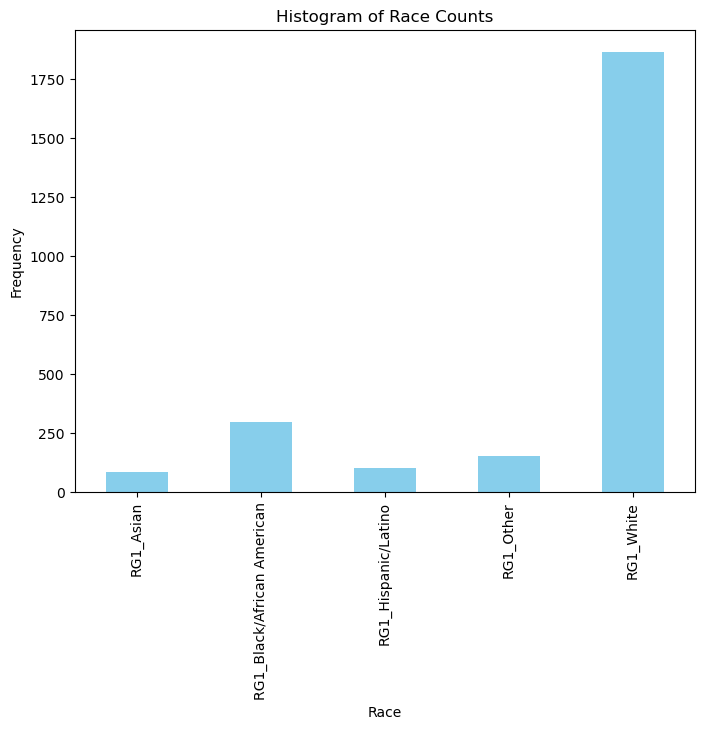

In [22]:
# Sum the counts of each race across all race dummy columns
race_counts = sample[['RG1_Asian', 'RG1_Black/African American', 'RG1_Hispanic/Latino', 'RG1_Other', 'RG1_White']].sum()

plt.figure(figsize=(8, 6))
race_counts.plot(kind='bar', color='skyblue')
plt.title('Histogram of Race Counts')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

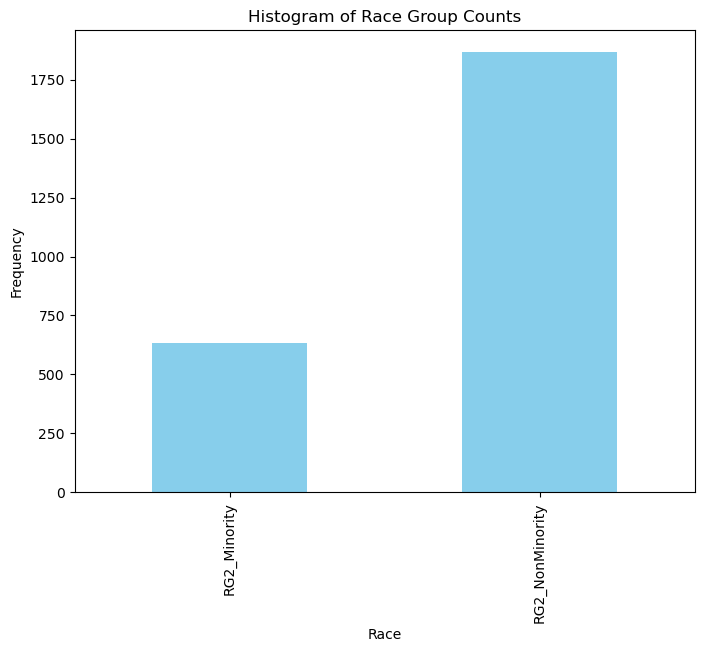

In [23]:
race_counts = sample[['RG2_Minority','RG2_NonMinority']].sum()

plt.figure(figsize=(8, 6))
race_counts.plot(kind='bar', color='skyblue')
plt.title('Histogram of Race Group Counts')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()


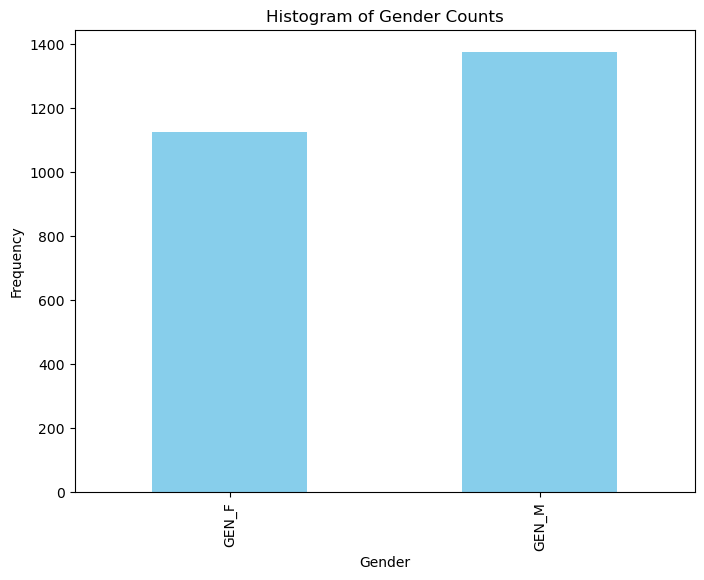

In [24]:
race_counts = sample[['GEN_F', 'GEN_M']].sum()

plt.figure(figsize=(8, 6))
race_counts.plot(kind='bar', color='skyblue')
plt.title('Histogram of Gender Counts')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

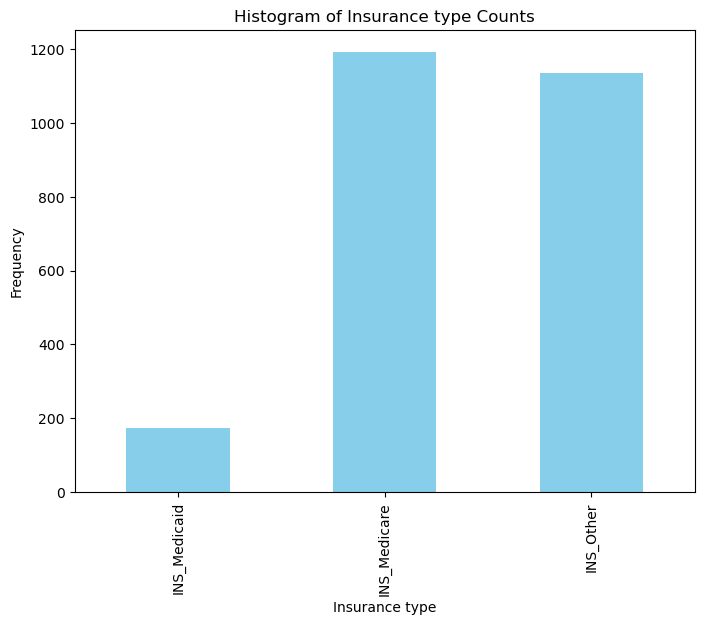

In [25]:
race_counts = sample[['INS_Medicaid', 'INS_Medicare', 'INS_Other']].sum()

plt.figure(figsize=(8, 6))
race_counts.plot(kind='bar', color='skyblue')
plt.title('Histogram of Insurance type Counts')
plt.xlabel('Insurance type')
plt.ylabel('Frequency')
plt.show()

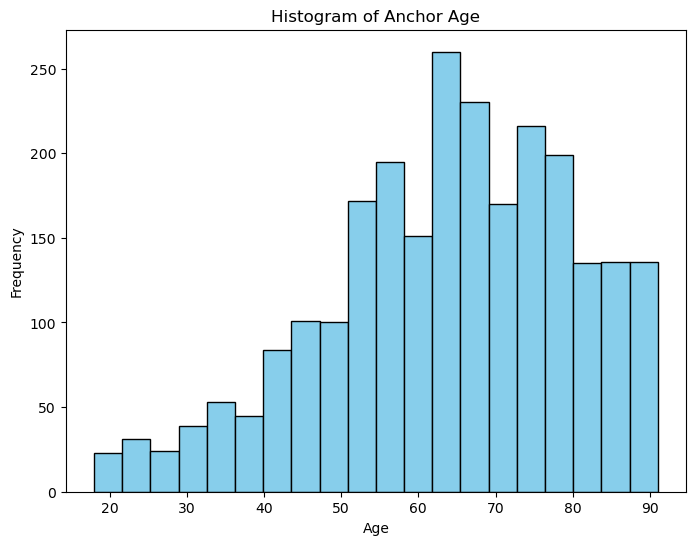

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(sample['anchor_age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Anchor Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

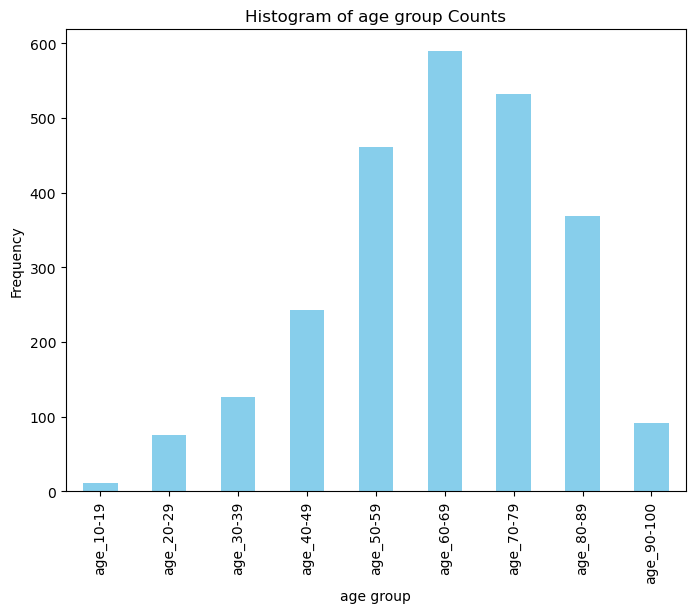

In [27]:
race_counts = sample[['age_10-19', 'age_20-29', 'age_30-39', 'age_40-49',
                    'age_50-59', 'age_60-69', 'age_70-79', 'age_80-89', 'age_90-100']].sum()

plt.figure(figsize=(8, 6))
race_counts.plot(kind='bar', color='skyblue')
plt.title('Histogram of age group Counts')
plt.xlabel('age group')
plt.ylabel('Frequency')
plt.show()

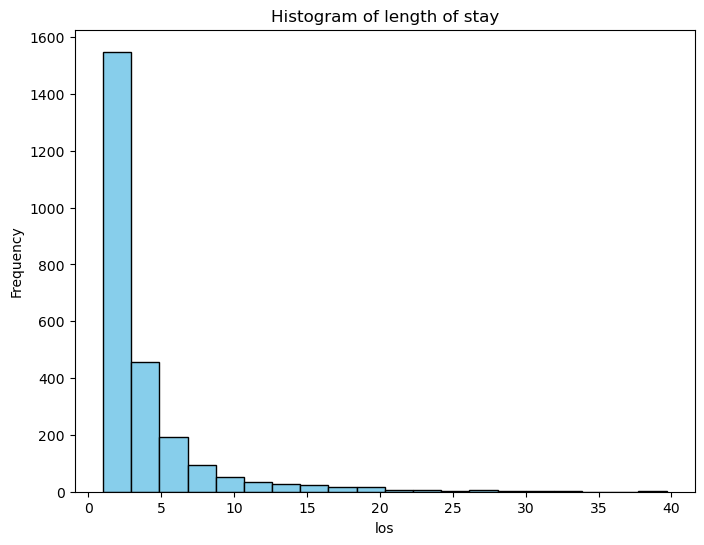

In [34]:
plt.figure(figsize=(8, 6))
plt.hist(sample['los'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of length of stay')
plt.xlabel('los')
plt.ylabel('Frequency')
plt.show()

In [37]:
sample_red = sample.copy()
sample_red = sample_red[sample_red['los'] < 21]

In [38]:
sample_red.columns

Index(['los', 'admission_location', 'raceGroup_1', 'diagnoses_num',
       'Chapter I', 'Chapter II', 'Chapter III', 'Chapter IV', 'Chapter V',
       'Chapter VI',
       ...
       'RG2_Minority', 'RG2_NonMinority', 'GEN_F', 'GEN_M', 'age_group2',
       'ageG_18-24', 'ageG_25-44', 'ageG_45-64', 'ageG_65-88', 'ageG_89+'],
      dtype='object', length=3244)

In [35]:
with open("columns.txt", "w") as f:
    for column in sample_red:
        f.write(column + "\n")


# Modelling

First we will use 4 protected attributes only namely: 'race', 'gender', 'insurance' and 'anchor_age'

In [52]:
invalid_features = [col for col in features if not isinstance(col, str) or any(char in col for char in ['[', ']', '<'])]

print("Invalid feature names:", invalid_features)

Invalid feature names: ['Click Change <--- to Choose a Base Solution']


In [44]:
baseline = sample['los'].mean()
baseline

3.754135611111112

In [53]:
sample_red.drop('Click Change <--- to Choose a Base Solution', axis=1, inplace=True)
sample_red.drop('Click Change to Choose a Base Solution', axis=1, inplace=True)

In [86]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Assuming sample_red is your DataFrame and 'los' is your target column
target = 'los'

# Get all columns from the DataFrame
all_columns = sample_red.columns.tolist()

# Create the features list by excluding the target column
features = [col for col in all_columns if col != target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sample_red[features], sample_red[target], test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Use squared error as the objective function
    random_state=42,
    max_depth=15,  # Increase the maximum depth of each tree
    learning_rate=0.01,  # Reduce the learning rate to make training more aggressive
    n_estimators=1000,  # Increase the number of boosting rounds (trees)
    subsample=0.8,  # Use a fraction of samples for each boosting round to introduce randomness
    colsample_bytree=0.8,  # Use a fraction of features for each boosting round to introduce randomness
    gamma=0,  # Regularization parameter to control tree complexity
    reg_alpha=0,  # L1 regularization term
    reg_lambda=1,  # L2 regularization term
)


model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)



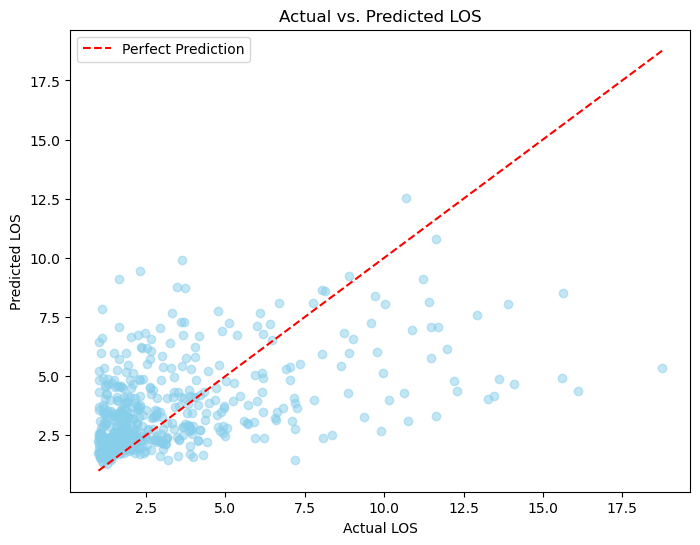

In [87]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs. Predicted LOS')
plt.xlabel('Actual LOS')
plt.ylabel('Predicted LOS')
plt.legend()
plt.show()

In [88]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error of XGBoost: {mse}')

# Calculate and print R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score of XGBoost: {r2}')

Mean Squared Error of XGBoost: 6.760836285807962
R-squared Score of XGBoost: 0.2058910140594481


In [89]:
baseline_predictions = [baseline] * len(y_test)
print("Mean Squared Error of Baseline:", mean_squared_error(y_test, baseline_predictions))
print("R2 Score of Baseline:", r2_score(y_test, baseline_predictions))

print("")

print("Mean Squared Error of LR:", mean_squared_error(y_test, y_pred))
print("R2 Score of LR:", r2_score(y_test, y_pred))

Mean Squared Error of Baseline: 8.669050163231283
R2 Score of Baseline: -0.01824246929959039

Mean Squared Error of LR: 6.760836285807962
R2 Score of LR: 0.2058910140594481


In [47]:
sample_red.drop('Click Change <--- to Choose a Base Solution', axis=1, inplace=True)
sample_red.drop('Click Change to Choose a Base Solution', axis=1, inplace=True)

## 1. Linear Regression

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
sample_red.drop('age_group2', axis=1, inplace=True)
sample_red.drop('raceGroup_1', axis=1, inplace=True)
sample_red.drop('admission_location', axis=1, inplace=True)

In [41]:
sample_red.drop('start_time', axis=1, inplace=True)

In [44]:
# features = ['FCU_CCU', 'FCU_CVICU', 'FCU_MICU','FCU_MICU/SICU', 'FCU_Neuro Intermediate', 'FCU_Neuro SICU',
#           'FCU_Neuro Stepdown', 'FCU_SICU', 'FCU_TSICU', 
#           'ADM_Emergency', 'ADM_Other', 'ADM_Referral', 'ADM_Transfer', 
#           'anchor_age', 'diagnoses_num', 
#           'INS_Medicaid', 'INS_Medicare', 'INS_Other', 
#           'RG1_Asian', 'RG1_Black/African American', 'RG1_Hispanic/Latino', 'RG1_Other', 'RG1_White', 
#           'GEN_F', 'GEN_M']
# Mean Squared Error: 16.22434961606911
# R2 Score: 0.15479259909966037

features = ['FCU_CCU', 'FCU_CVICU', 'FCU_MICU','FCU_MICU/SICU', 'FCU_Neuro Intermediate', 'FCU_Neuro SICU',
          'FCU_Neuro Stepdown', 'FCU_SICU', 'FCU_TSICU', 
          'ADM_Emergency', 'ADM_Other', 'ADM_Referral', 'ADM_Transfer', 

          'num_procedures',

          #'anchor_age', 
          # 'age_10-19', 'age_20-29', 'age_30-39', 'age_40-49',
          # 'age_50-59', 'age_60-69', 'age_70-79', 'age_80-89', 'age_90-100',

          'ageG_18-24', 'ageG_25-44', 'ageG_45-64', 'ageG_65-88', 
          'ageG_89+', 

          'Chapter I', 'Chapter II',
          'Chapter III', 'Chapter IV', 'Chapter IX', 'Chapter V', 'Chapter VI',
          'Chapter VII', 'Chapter VIII', 'Chapter X', 'Chapter XI',
          'Chapter XII', 'Chapter XIII', 'Chapter XIV', 'Chapter XIX',
          'Chapter XV', 'Chapter XVI', 'Chapter XVII', 'Chapter XVIII',
          'Chapter XX', 'Chapter XXI', 
          'INS_Medicaid', 'INS_Medicare', 'INS_Other', 
          # 'RG1_Asian', 'RG1_Black/African American', 'RG1_Hispanic/Latino', 'RG1_Other', 'RG1_White', 
         'RG2_Minority', 'RG2_NonMinority',
          'GEN_F', 'GEN_M'
        ]

# Mean Squared Error: 13.593445136159074
# R2 Score: 0.29184955300550053

target = 'los'


X_train, X_test, y_train, y_test = train_test_split(sample_red[features], sample_red[target], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# RG2 
# Mean Squared Error: 13.578375714193088
# R2 Score: 0.29263459445704376

# RG1
# Mean Squared Error: 13.588307499674858
# R2 Score: 0.29211719814890247

# --> SIM RESULTS

# Mean Squared Error: 13.580305289481647
# R2 Score: 0.29253407324336933
# --> better results w age groups

# Mean Squared Error: 7.720262110946752
# R2 Score: 0.2112852048148135

latest
Mean Squared Error of LR: 7.723040809169681
R2 Score of LR: 0.2110013283908938



SyntaxError: invalid syntax (4198217183.py, line 67)

In [72]:
target = 'los'

# Get all columns from the DataFrame
all_columns = sample_red.columns.tolist()

# Create the features list by excluding the target column
features = [col for col in all_columns if col != target]

X_train, X_test, y_train, y_test = train_test_split(sample_red[features], sample_red[target], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [74]:
baseline_predictions = [baseline] * len(y_test)
print("Mean Squared Error of Baseline:", mean_squared_error(y_test, baseline_predictions))
print("R2 Score of Baseline:", r2_score(y_test, baseline_predictions))

print("")

print("Mean Squared Error of LR:", mean_squared_error(y_test, y_pred))
print("R2 Score of LR:", r2_score(y_test, y_pred))

Mean Squared Error of Baseline: 8.669050163231283
R2 Score of Baseline: -0.01824246929959039

Mean Squared Error of LR: 2.9775304761370548e+16
R2 Score of LR: -3497324305834325.0


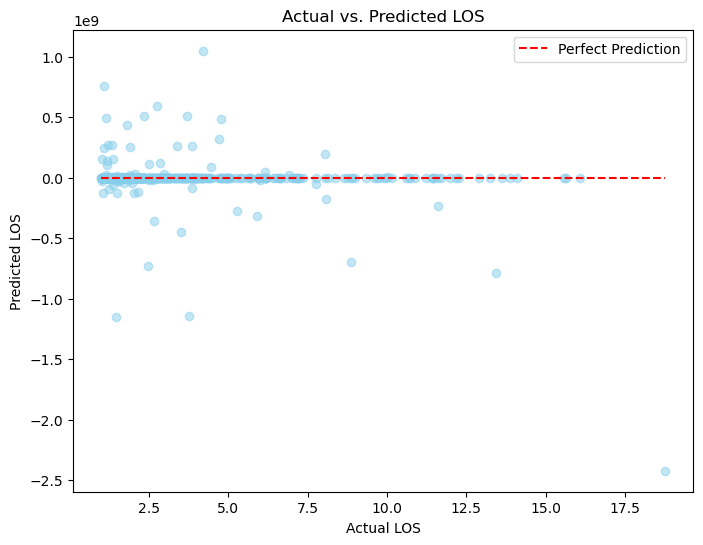

In [71]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs. Predicted LOS')
plt.xlabel('Actual LOS')
plt.ylabel('Predicted LOS')
plt.legend()
plt.show()

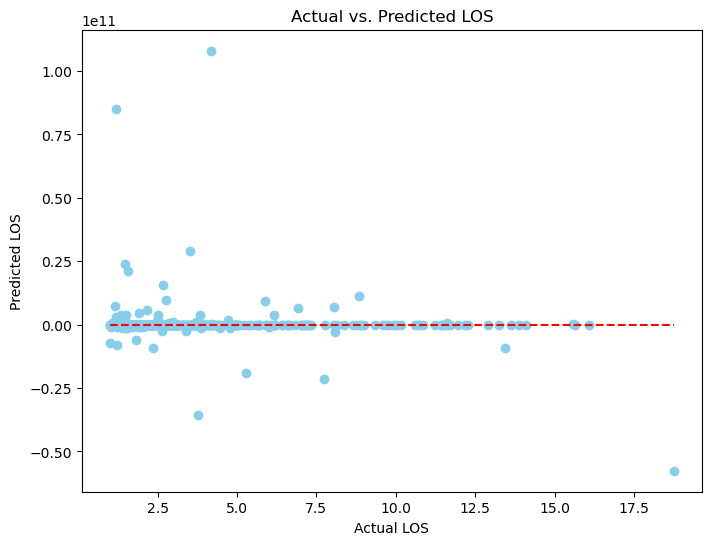

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.title('Actual vs. Predicted LOS')
plt.xlabel('Actual LOS')
plt.ylabel('Predicted LOS')
plt.show()

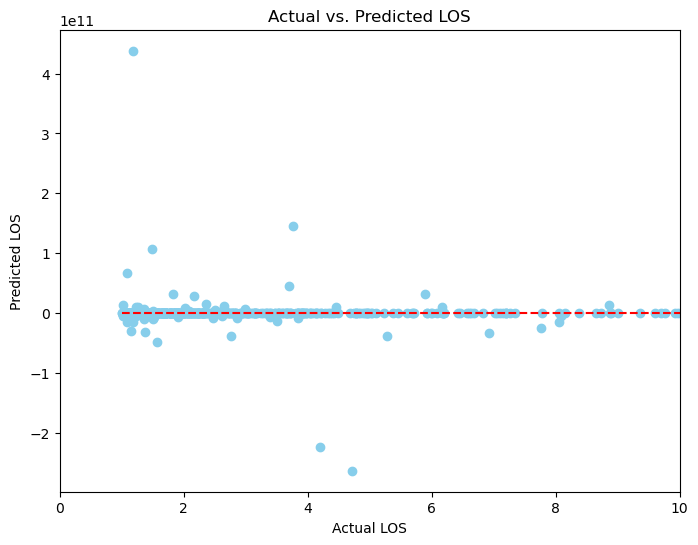

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.title('Actual vs. Predicted LOS')
plt.xlabel('Actual LOS')
plt.ylabel('Predicted LOS')

plt.xlim(0, 10)

plt.show()

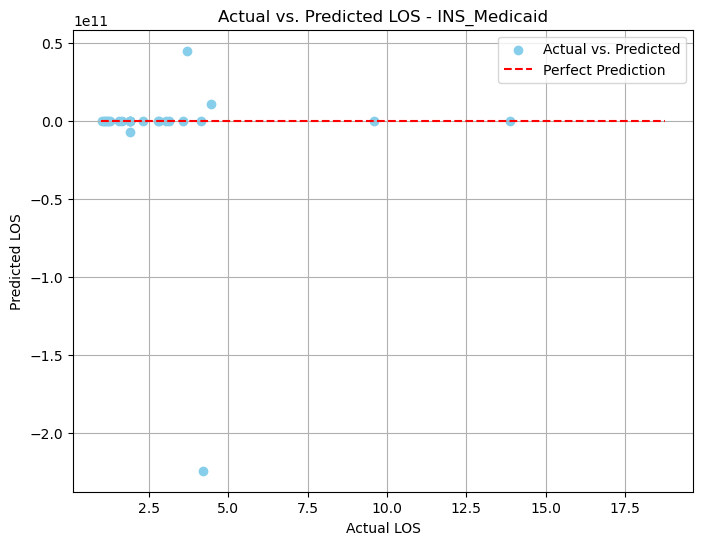

RMSE for INS_Medicaid: 45779329933.27102
R2 Score for INS_Medicaid: -2.6407122391285668e+20



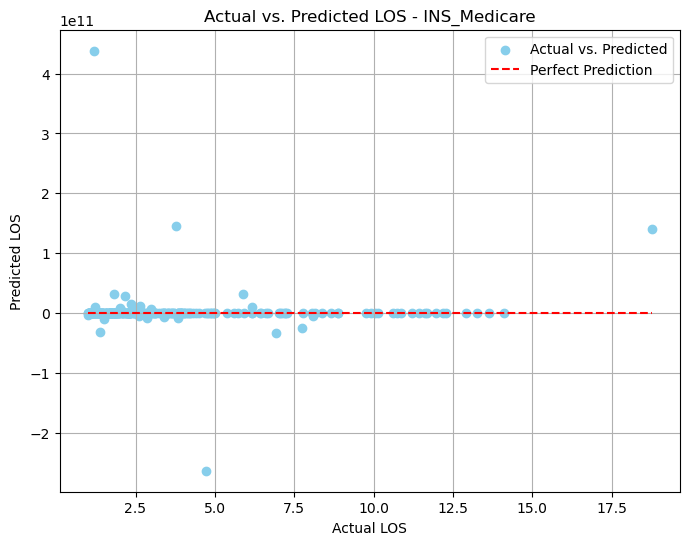

RMSE for INS_Medicare: 35370172158.07954
R2 Score for INS_Medicare: -1.3465834427910288e+20



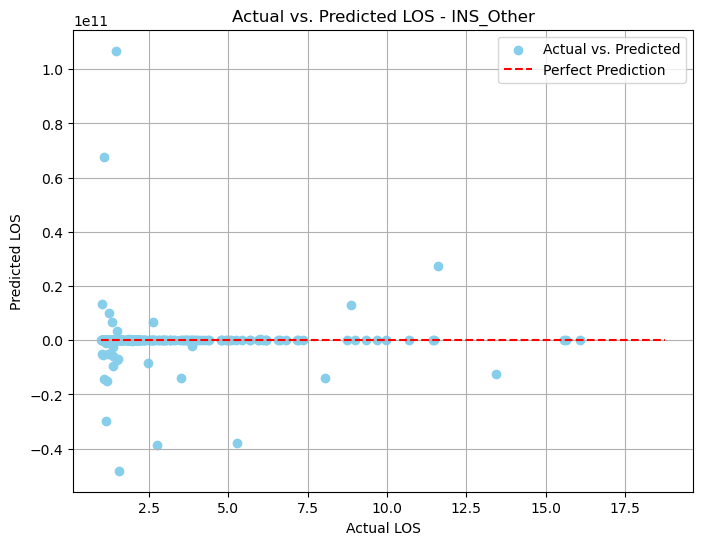

RMSE for INS_Other: 10562957661.549591
R2 Score for INS_Other: -1.482099384730183e+19



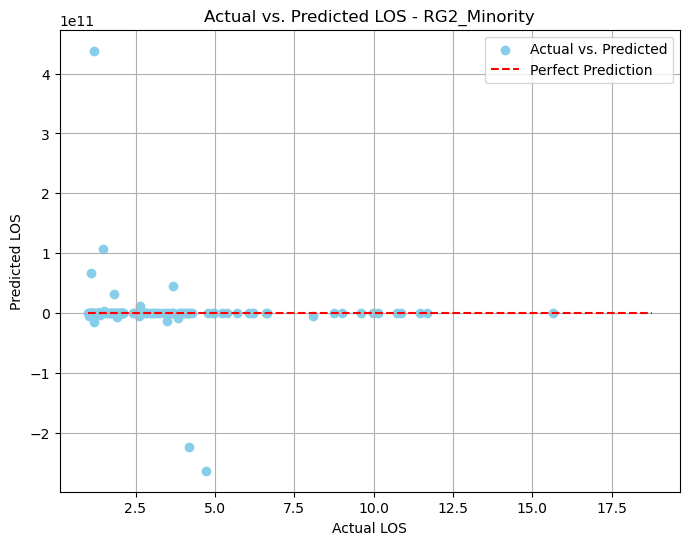

RMSE for RG2_Minority: 53909667225.347626
R2 Score for RG2_Minority: -3.787642990816845e+20



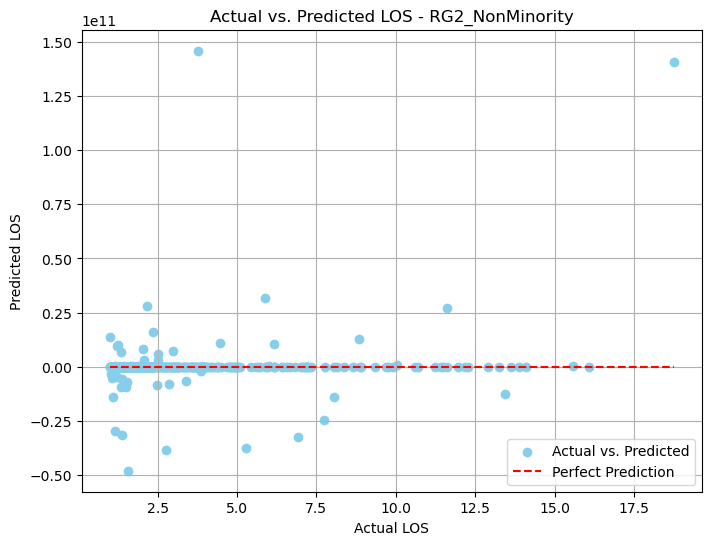

RMSE for RG2_NonMinority: 12015333848.731823
R2 Score for RG2_NonMinority: -1.647148670049889e+19



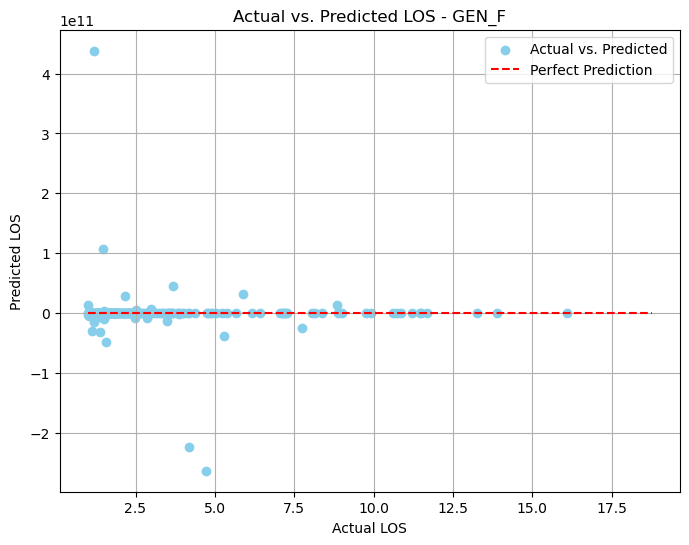

RMSE for GEN_F: 42160920407.325294
R2 Score for GEN_F: -2.1144759081744364e+20



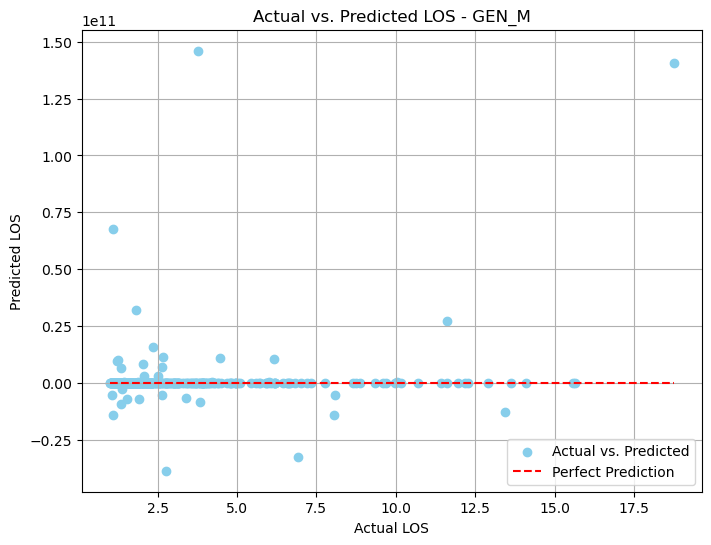

RMSE for GEN_M: 13035216724.264269
R2 Score for GEN_M: -1.9815528035300016e+19



In [53]:
protected_attributes = ['INS_Medicaid', 'INS_Medicare', 'INS_Other', 
                        'RG2_Minority', 'RG2_NonMinority',
                        'GEN_F', 'GEN_M']

for attribute in protected_attributes:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[X_test[attribute]==1], y_pred[X_test[attribute]==1], color='skyblue', label='Actual vs. Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Prediction')
    plt.title(f'Actual vs. Predicted LOS - {attribute}')
    plt.xlabel('Actual LOS')
    plt.ylabel('Predicted LOS')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Calculate RMSE and R2 for each protected attribute
    rmse_attribute = mean_squared_error(y_test[X_test[attribute]==1], y_pred[X_test[attribute]==1], squared=False)
    r2_attribute = r2_score(y_test[X_test[attribute]==1], y_pred[X_test[attribute]==1])
    print(f"RMSE for {attribute}: {rmse_attribute}")
    print(f"R2 Score for {attribute}: {r2_attribute}\n")



**Results/Discussion:**

1. SEX

MALE:
- RMSE for GEN_M: 2.5948752913677047
- R2 Score for GEN_M: 0.29323704472166523
--> lower rmse and higher R2

FEMALE:
- RMSE for GEN_F: 2.906731357592616
- R2 Score for GEN_F: 0.10170079628603379

**--> Bias towards Male**



2.  RACE

MINORITY: 
- RMSE for RG2_Minority: 3.1335495260556514
- R2 Score for RG2_Minority: 0.17005633640331264

NON-MINORITY:
- RMSE for RG2_NonMinority: 2.627690787630952
- R2 Score for RG2_NonMinority: 0.21640818192722677

**--> Bias towards non-minority i.t.o rmse**




3. INSURANCE

MEDICAID:
- RMSE for INS_Medicaid: 2.3220661480424476
- R2 Score for INS_Medicaid: 0.44036717316141805
--> lower rmse and higher R2

MEDICARE:  
- RMSE for INS_Medicare: 2.805090824970127
- R2 Score for INS_Medicare: 0.2718211069952208

OTHER:    
- RMSE for INS_Other: 2.728315064003676
- R2 Score for INS_Other: 0.06091581670272683    

**--> Bias towards MEDICAID, maybe bc of class imbalance too**


## 2. XGBoost

**Best:** Mean Squared Error: 13.945680788944017, R2 Score: 0.2734998386785896

In [65]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [71]:
features = ['FCU_CCU', 'FCU_CVICU', 'FCU_MICU','FCU_MICU/SICU', 'FCU_Neuro Intermediate', 'FCU_Neuro SICU',
          'FCU_Neuro Stepdown', 'FCU_SICU', 'FCU_TSICU', 
          'ADM_Emergency', 'ADM_Other', 'ADM_Referral', 'ADM_Transfer', 
          #'anchor_age', 
          'age_10-19', 'age_20-29', 'age_30-39', 'age_40-49',
          'age_50-59', 'age_60-69', 'age_70-79', 'age_80-89', 'age_90-100',
          'Chapter I', 'Chapter II',
          'Chapter III', 'Chapter IV', 'Chapter IX', 'Chapter V', 'Chapter VI',
          'Chapter VII', 'Chapter VIII', 'Chapter X', 'Chapter XI',
          'Chapter XII', 'Chapter XIII', 'Chapter XIV', 'Chapter XIX',
          'Chapter XV', 'Chapter XVI', 'Chapter XVII', 'Chapter XVIII',
          'Chapter XX', 'Chapter XXI', 
          'INS_Medicaid', 'INS_Medicare', 'INS_Other', 
        #   'RG1_Asian', 'RG1_Black/African American', 'RG1_Hispanic/Latino', 'RG1_Other', 'RG1_White', 
          'RG2_Minority', 'RG2_NonMinority',
          'GEN_F', 'GEN_M']

target = 'los'


X_train, X_test, y_train, y_test = train_test_split(sample[features], sample[target], test_size=0.2, random_state=42)

In [66]:
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

#  Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

# predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.6}
Mean Squared Error: 14.000598511522563
R2 Score: 0.27063890023345116


<Figure size 1000x800 with 0 Axes>

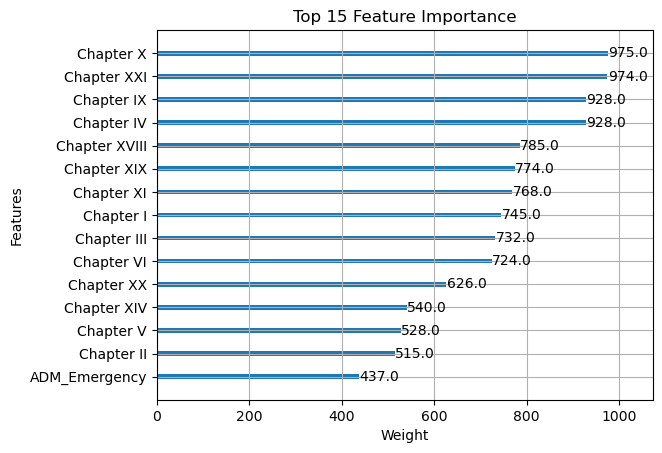

In [67]:
# Plot top 15 feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(best_model, importance_type='weight', max_num_features=15, xlabel='Weight')
plt.title('Top 15 Feature Importance')
plt.show()


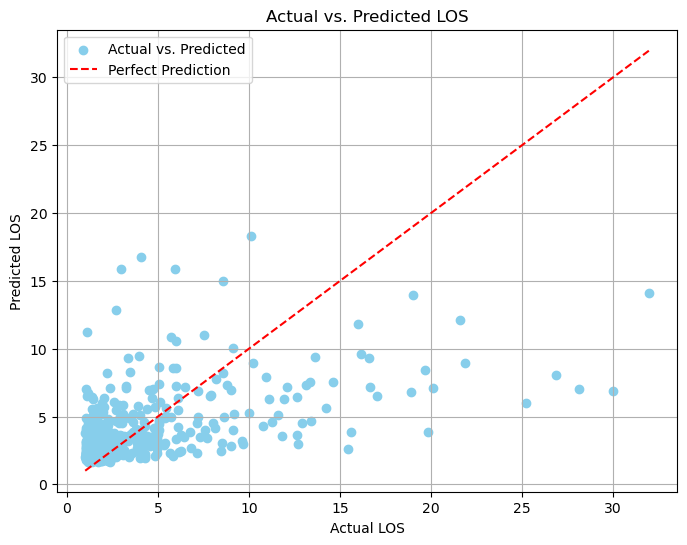

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted LOS')
plt.xlabel('Actual LOS')
plt.ylabel('Predicted LOS')
plt.legend()
plt.grid(True)
plt.show()


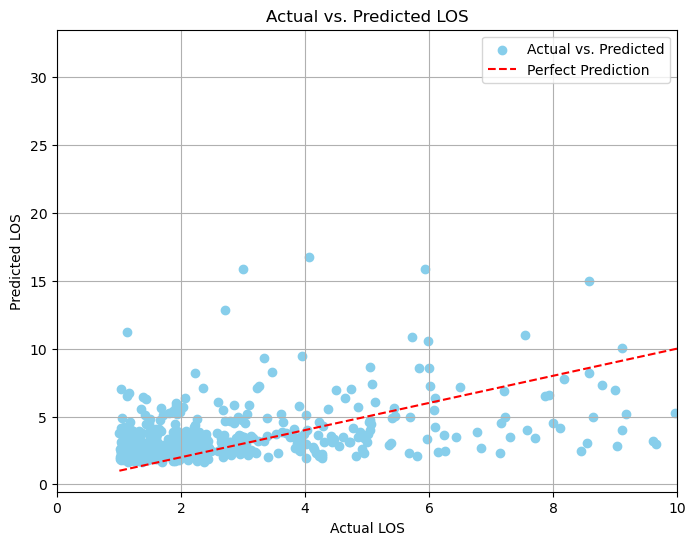

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted LOS')
plt.xlabel('Actual LOS')
plt.ylabel('Predicted LOS')
plt.legend()
plt.grid(True)

# Set x-axis limit to 10
plt.xlim(0, 10)

plt.show()


### Evaluate XGBoost protected att

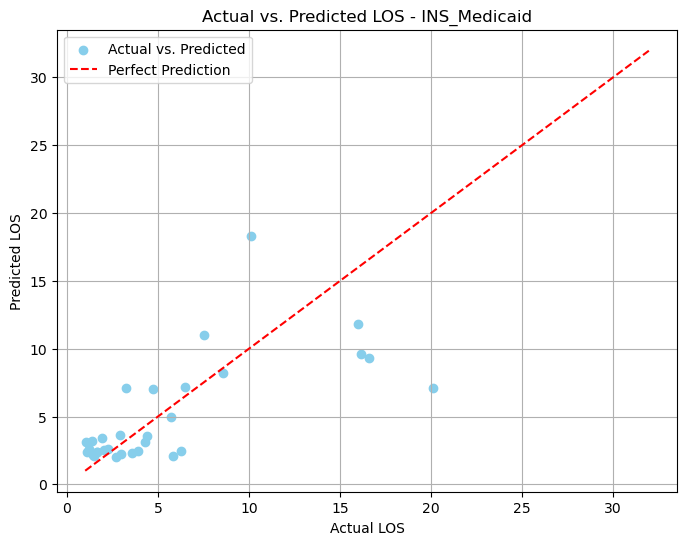

RMSE for INS_Medicaid: 3.7351161091436222
R2 Score for INS_Medicaid: 0.4620301227181114



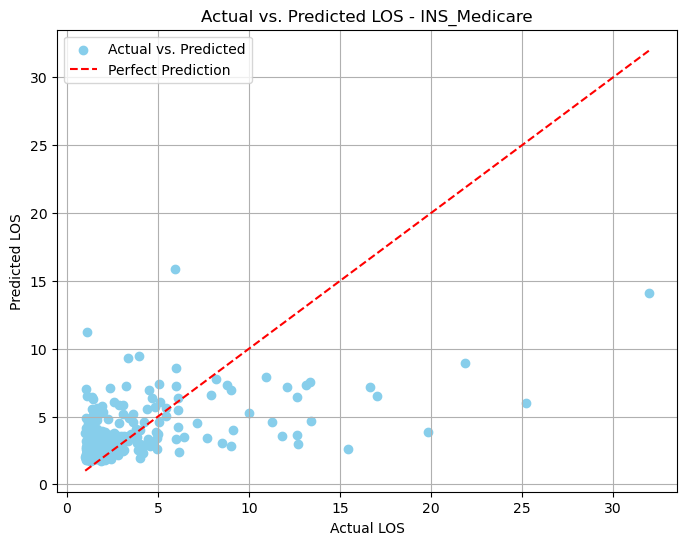

RMSE for INS_Medicare: 3.533874911554485
R2 Score for INS_Medicare: 0.24861853929737432



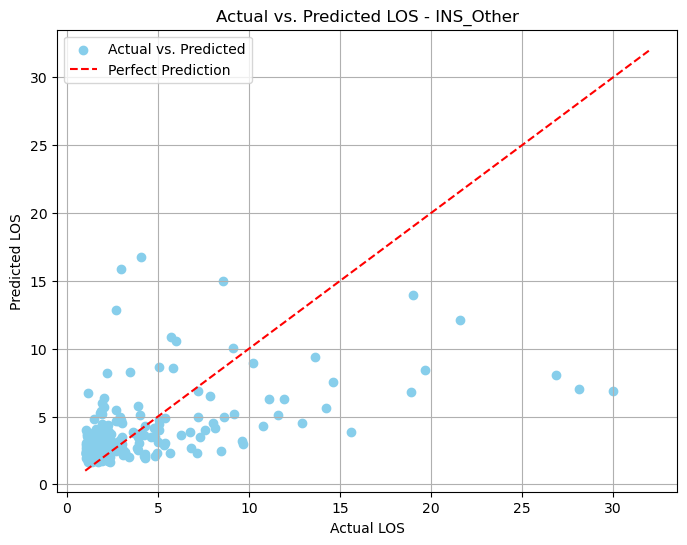

RMSE for INS_Other: 3.9574685156748854
R2 Score for INS_Other: 0.24227618737844125



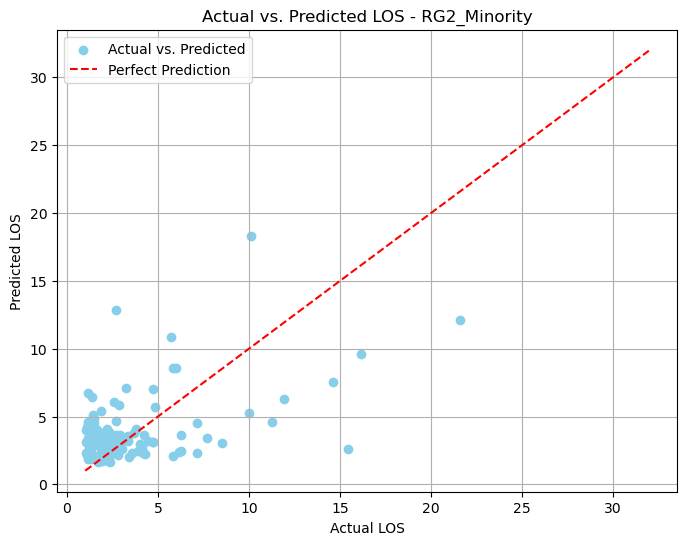

RMSE for RG2_Minority: 2.965877412377704
R2 Score for RG2_Minority: 0.19308996121466748



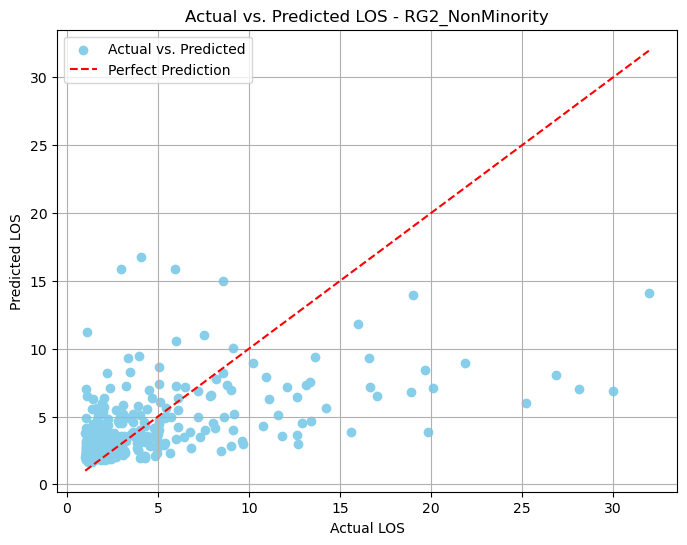

RMSE for RG2_NonMinority: 3.9621346061538394
R2 Score for RG2_NonMinority: 0.28003796782690205



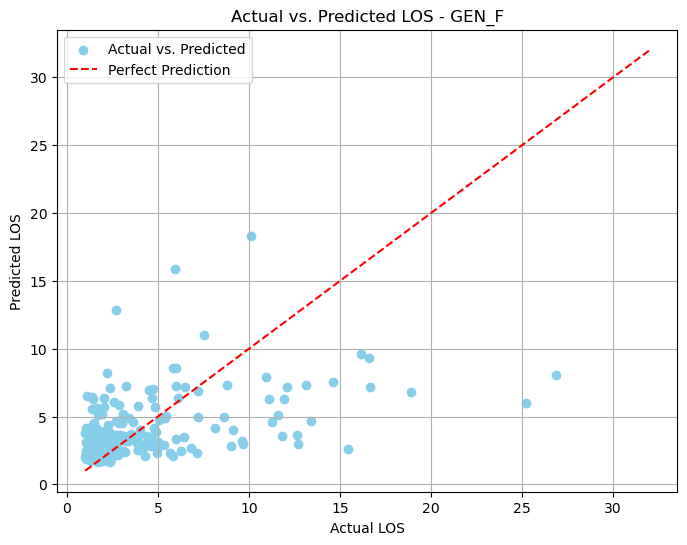

RMSE for GEN_F: 3.5960276945683463
R2 Score for GEN_F: 0.1970922569232998



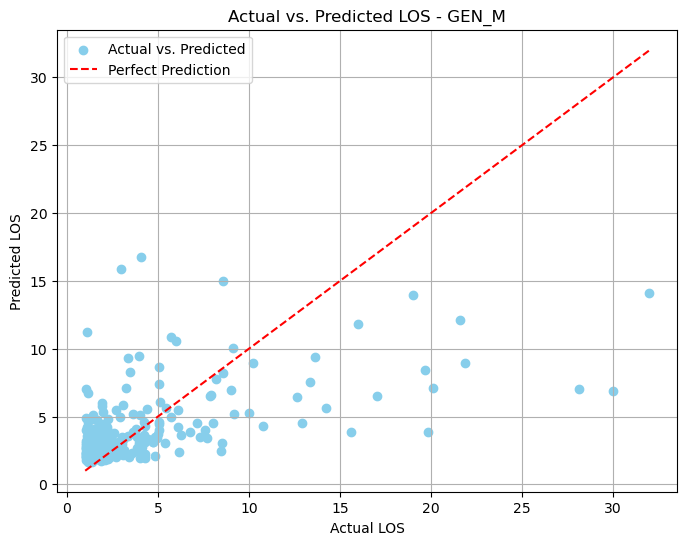

RMSE for GEN_M: 3.8605800280789695
R2 Score for GEN_M: 0.31653944024152836



In [70]:
protected_attributes = ['INS_Medicaid', 'INS_Medicare', 'INS_Other', 
                        'RG2_Minority', 'RG2_NonMinority',
                        'GEN_F', 'GEN_M']

for attribute in protected_attributes:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[X_test[attribute]==1], y_pred[X_test[attribute]==1], color='skyblue', label='Actual vs. Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Prediction')
    plt.title(f'Actual vs. Predicted LOS - {attribute}')
    plt.xlabel('Actual LOS')
    plt.ylabel('Predicted LOS')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Calculate RMSE and R2 for each protected attribute
    rmse_attribute = mean_squared_error(y_test[X_test[attribute]==1], y_pred[X_test[attribute]==1], squared=False)
    r2_attribute = r2_score(y_test[X_test[attribute]==1], y_pred[X_test[attribute]==1])
    print(f"RMSE for {attribute}: {rmse_attribute}")
    print(f"R2 Score for {attribute}: {r2_attribute}\n")



#### w los< 20

Mean Squared Error: 7.431616381202647
R2 Score: 0.2153616427966365

In [72]:
features = ['FCU_CCU', 'FCU_CVICU', 'FCU_MICU','FCU_MICU/SICU', 'FCU_Neuro Intermediate', 'FCU_Neuro SICU',
          'FCU_Neuro Stepdown', 'FCU_SICU', 'FCU_TSICU', 
          'ADM_Emergency', 'ADM_Other', 'ADM_Referral', 'ADM_Transfer', 
          #'anchor_age', 
          'age_10-19', 'age_20-29', 'age_30-39', 'age_40-49',
          'age_50-59', 'age_60-69', 'age_70-79', 'age_80-89', 'age_90-100',
          'Chapter I', 'Chapter II',
          'Chapter III', 'Chapter IV', 'Chapter IX', 'Chapter V', 'Chapter VI',
          'Chapter VII', 'Chapter VIII', 'Chapter X', 'Chapter XI',
          'Chapter XII', 'Chapter XIII', 'Chapter XIV', 'Chapter XIX',
          'Chapter XV', 'Chapter XVI', 'Chapter XVII', 'Chapter XVIII',
          'Chapter XX', 'Chapter XXI', 
          'INS_Medicaid', 'INS_Medicare', 'INS_Other', 
        #   'RG1_Asian', 'RG1_Black/African American', 'RG1_Hispanic/Latino', 'RG1_Other', 'RG1_White', 
          'RG2_Minority', 'RG2_NonMinority',
          'GEN_F', 'GEN_M']

target = 'los'


X_train, X_test, y_train, y_test = train_test_split(sample_red[features], sample_red[target], test_size=0.2, random_state=42)

In [76]:
param_grid = {
    'max_depth': [6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [500, 1000],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

#  Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

# predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


KeyboardInterrupt: 

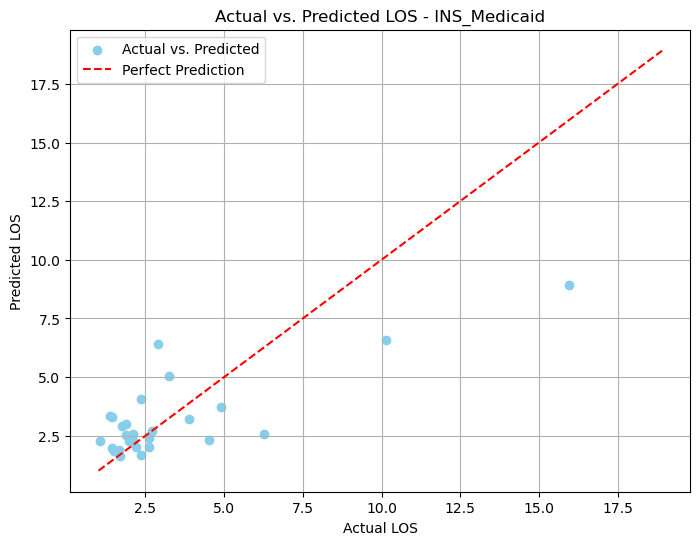

RMSE for INS_Medicaid: 2.0572360358298494
R2 Score for INS_Medicaid: 0.5607393973201185



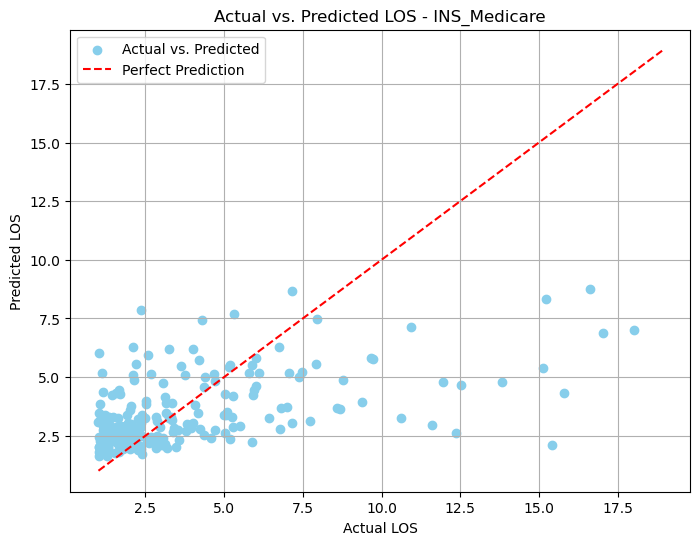

RMSE for INS_Medicare: 2.779760317122542
R2 Score for INS_Medicare: 0.28491291808387054



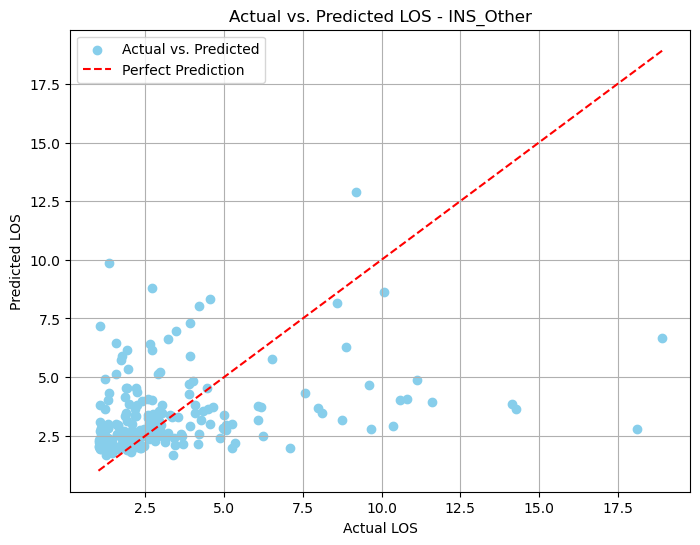

RMSE for INS_Other: 2.7388120994116476
R2 Score for INS_Other: 0.05367577076519481



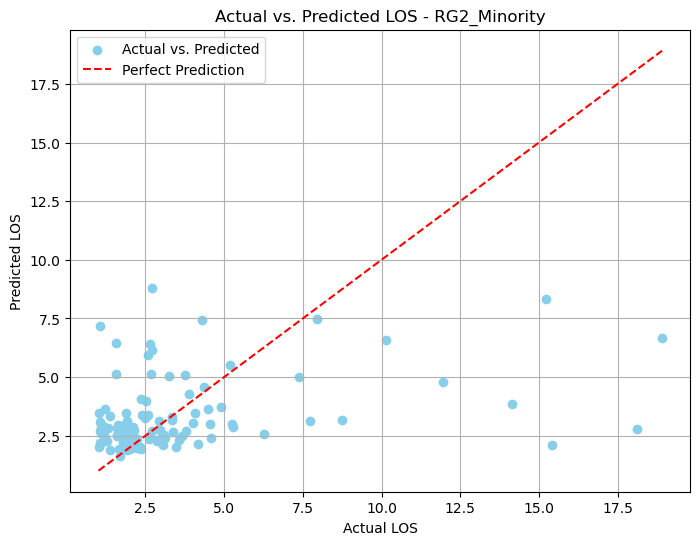

RMSE for RG2_Minority: 3.2437221336252122
R2 Score for RG2_Minority: 0.1106703419753825



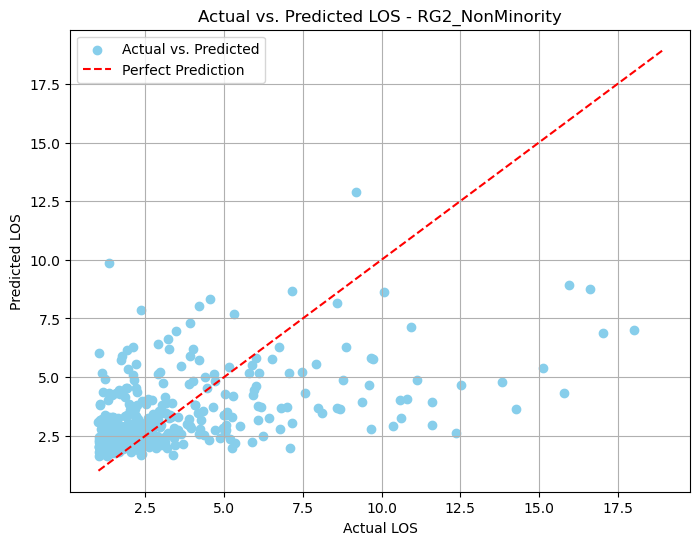

RMSE for RG2_NonMinority: 2.564182047441545
R2 Score for RG2_NonMinority: 0.2538277629228397



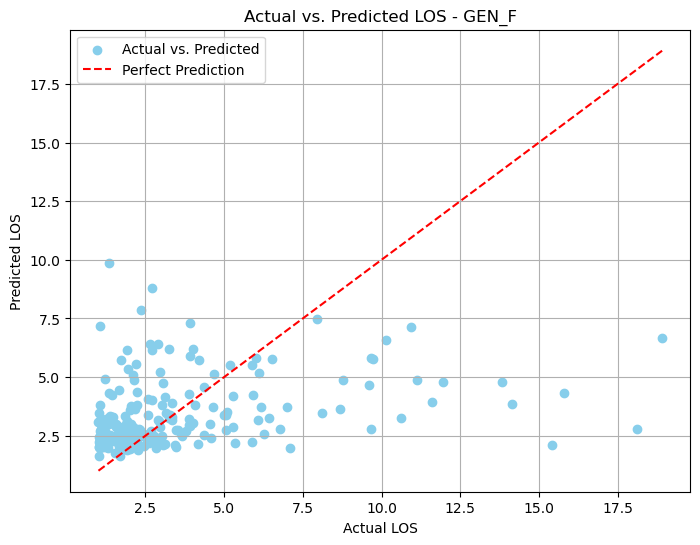

RMSE for GEN_F: 2.9141162065646387
R2 Score for GEN_F: 0.09713055565252093



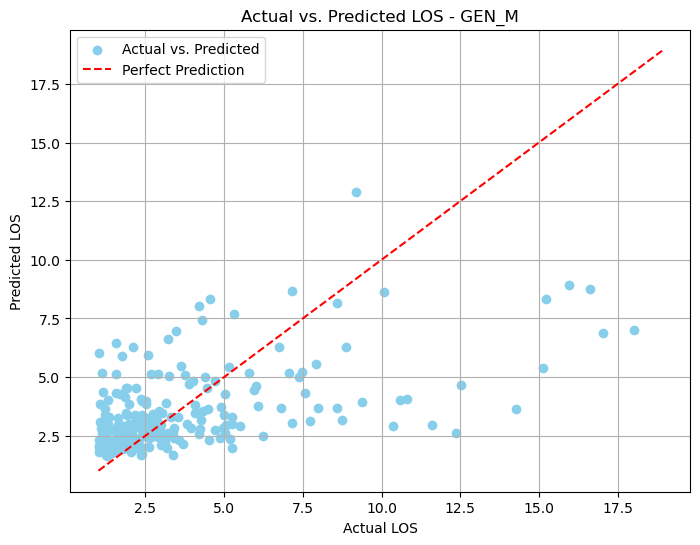

RMSE for GEN_M: 2.5488494273267075
R2 Score for GEN_M: 0.31808670552153095



In [74]:
protected_attributes = ['INS_Medicaid', 'INS_Medicare', 'INS_Other', 
                        'RG2_Minority', 'RG2_NonMinority',
                        'GEN_F', 'GEN_M']

for attribute in protected_attributes:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[X_test[attribute]==1], y_pred[X_test[attribute]==1], color='skyblue', label='Actual vs. Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Prediction')
    plt.title(f'Actual vs. Predicted LOS - {attribute}')
    plt.xlabel('Actual LOS')
    plt.ylabel('Predicted LOS')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Calculate RMSE and R2 for each protected attribute
    rmse_attribute = mean_squared_error(y_test[X_test[attribute]==1], y_pred[X_test[attribute]==1], squared=False)
    r2_attribute = r2_score(y_test[X_test[attribute]==1], y_pred[X_test[attribute]==1])
    print(f"RMSE for {attribute}: {rmse_attribute}")
    print(f"R2 Score for {attribute}: {r2_attribute}\n")



In [ ]:
--> bias gender

# Binary classification: Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [75]:
sample['los'].describe()

count    2500.000000
mean        3.791586
std         4.304368
min         1.001574
25%         1.561204
50%         2.261169
75%         4.073811
max        39.669919
Name: los, dtype: float64

In [76]:
sample['bin_los'] = (sample['los'] > 4).astype(int)

In [82]:
# features = ['FCU_CCU', 'FCU_CVICU', 'FCU_MICU','FCU_MICU/SICU', 'FCU_Neuro Intermediate', 'FCU_Neuro SICU',
#           'FCU_Neuro Stepdown', 'FCU_SICU', 'FCU_TSICU', 
#           'ADM_Emergency', 'ADM_Other', 'ADM_Referral', 'ADM_Transfer', 
#           'anchor_age', 'diagnoses_num', 
#           'INS_Medicaid', 'INS_Medicare', 'INS_Other', 
#           'RG1_Asian', 'RG1_Black/African American', 'RG1_Hispanic/Latino', 'RG1_Other', 'RG1_White', 
#           'GEN_F', 'GEN_M']
# Mean Squared Error: 16.22434961606911
# R2 Score: 0.15479259909966037

features = ['FCU_CCU', 'FCU_CVICU', 'FCU_MICU','FCU_MICU/SICU', 'FCU_Neuro Intermediate', 'FCU_Neuro SICU',
          'FCU_Neuro Stepdown', 'FCU_SICU', 'FCU_TSICU', 
          'ADM_Emergency', 'ADM_Other', 'ADM_Referral', 'ADM_Transfer', 
          #'anchor_age', 
          'age_10-19', 'age_20-29', 'age_30-39', 'age_40-49',
          'age_50-59', 'age_60-69', 'age_70-79', 'age_80-89', 'age_90-100',
          'Chapter I', 'Chapter II',
          'Chapter III', 'Chapter IV', 'Chapter IX', 'Chapter V', 'Chapter VI',
          'Chapter VII', 'Chapter VIII', 'Chapter X', 'Chapter XI',
          'Chapter XII', 'Chapter XIII', 'Chapter XIV', 'Chapter XIX',
          'Chapter XV', 'Chapter XVI', 'Chapter XVII', 'Chapter XVIII',
          'Chapter XX', 'Chapter XXI', 
          'INS_Medicaid', 'INS_Medicare', 'INS_Other', 
        #   'RG1_Asian', 'RG1_Black/African American', 'RG1_Hispanic/Latino', 'RG1_Other', 'RG1_White', 
          'RG2_Minority', 'RG2_NonMinority',
          'GEN_F', 'GEN_M']

# Mean Squared Error: 13.593445136159074
# R2 Score: 0.29184955300550053

target = 'bin_los'


X_train, X_test, y_train, y_test = train_test_split(sample[features], sample[target], test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(len(y_test))

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)



500
Accuracy: 0.782
Confusion Matrix:
[[338  26]
 [ 83  53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       364
           1       0.67      0.39      0.49       136

    accuracy                           0.78       500
   macro avg       0.74      0.66      0.68       500
weighted avg       0.77      0.78      0.76       500

